tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])
tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>) torch.Size([2, 6])
Mean:  tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:  tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)
Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[-5.9605e-08],
        [ 1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)
Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)
Normalized layer outputs:
 tensor([[ 0.4945,  0.9564, -0.0200,  0.2375, -1.6685],
        [ 0.8127, -1.2313, -0.8554,  1.0110,  0.263

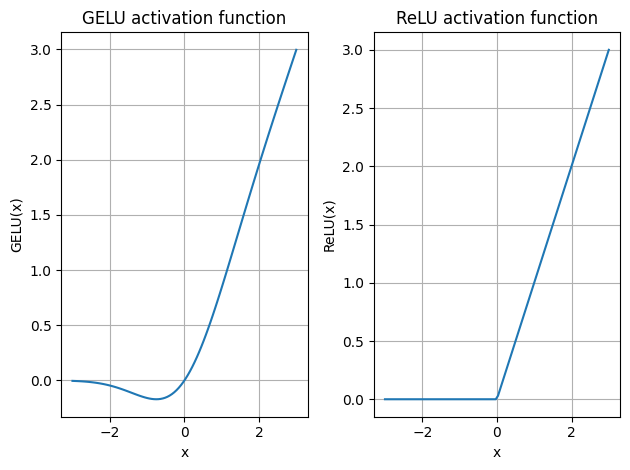

torch.Size([2, 3, 768])
layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152039906941354
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031
layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694106817245483
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)
tensor([0.4419, 0.6515, 0.5683])
tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.84

In [1]:
import torch
from gpt2 import GPTModel;

In [2]:
GPT_CONFIG_124M = {
    "vocab_size" : 50257, 
    "context_length": 256, # number of tokens shortened from 1024 to 256
    "emb_dim": 768, # same for both input and output
    "n_heads": 12, 
    "n_layers": 12, # number of transformer layers
    "drop_rate": 0.1, 
    "qkv_bias": False
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval(); # returns a long output if the semicolon is not used

In [3]:
import tiktoken
from gpt2 import generate_text_simple

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'}) # returns a list
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # adding the batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flattened = token_ids.squeeze(0) # removes the batch dimension
    decoded = tokenizer.decode(flattened.tolist())
    return decoded

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
    model = model, 
    idx = text_to_token_ids(start_context, tokenizer), 
    max_new_tokens = 10, 
    context_size = GPT_CONFIG_124M["context_length"]
)
print("Output text: ", token_ids_to_text(token_ids, tokenizer))

Output text:  Every effort moves you rentingetic wasnم refres RexMeCHicular stren


In [4]:
inputs = torch.tensor([[16833, 3626, 6100], # ["every effort moves",
                        [40, 1107, 588]]) # "I really like"]
targets = torch.tensor([[3626, 6100, 345 ], # [" effort moves you",
                        [1107, 588, 11311]]) # " really like chocolate"]
# The targets are the inputs but shifted one position forward

In [5]:
with torch.no_grad(): # disables gradient tracking since we're not training yet
    logits = model(inputs) # shape (batch_size, num_tokens, vocab_size)

probs = torch.softmax(logits, dim=-1)
print(probs.shape)

torch.Size([2, 3, 50257])


In [6]:
token_ids = torch.argmax(probs, dim=-1, keepdim=True) # shape (2, 3, 1)
print("Token IDs: ", token_ids)

Token IDs:  tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [7]:
print(f"Targets of batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outptus of batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}") # flattening the token IDs tensor
# is important, otherwise the tolist() function wouldn't work

Targets of batch 1:  effort moves you
Outptus of batch 1:  Armed heNetflix


In [8]:
# for each of the two input texts, print the softmax probability scores corresponding to the target token IDs, i.e.,
# the "right" token IDs
text_idx = 0
target_probs_1  = probs[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probs_1)

text_idx = 1
target_probs_2  = probs[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probs_2)

Text 1: tensor([    0.0001,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0001,     0.0000])


In [9]:
log_probs = torch.log(torch.cat((target_probs_1, target_probs_2))) # torch.cat expects a tuple of tensors as input, 
# not individual tensors as its arguments
print(log_probs)

tensor([ -9.5045, -10.3798, -11.3674, -11.4792,  -9.7771, -12.2549])


In [10]:
avg_log_probs = torch.mean(log_probs)
neg_avg_log_probs = - avg_log_probs
print(neg_avg_log_probs) # the cross entropy loss

tensor(10.7938)


In [11]:
print("Logits shape: ", logits.shape) # contain the un-normalized model outputs
print("Targets shape: ", targets.shape)

Logits shape:  torch.Size([2, 3, 50257])
Targets shape:  torch.Size([2, 3])


In [12]:
print(targets) # the token IDs corresponding to the desired output words for each input word

tensor([[ 3626,  6100,   345],
        [ 1107,   588, 11311]])


In [13]:
flattened_logits = logits.flatten(0, 1) # flatten dimension 0 and 1 into a single dimension 
flattened_targets = targets.flatten(0, 1)

print("Flattened logits shape: ", flattened_logits.shape)
print("Flattened targets shape: ", flattened_targets.shape)

Flattened logits shape:  torch.Size([6, 50257])
Flattened targets shape:  torch.Size([6])


In [14]:
loss = torch.nn.functional.cross_entropy(flattened_logits, flattened_targets) # just pass in the unnormalized logits 
#and targets
print(loss)

tensor(10.7938)


In [15]:
file_path = "the-verdict.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [16]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Total characters: ", total_characters)
print("Total tokens: ", total_tokens)

Total characters:  20479
Total tokens:  5145


In [17]:
# splitting the data into training and validation data
train_ratio = 0.9
split_idx = int(train_ratio * len(text_data))
train_txt = text_data[:split_idx]
val_txt = text_data[split_idx:]

In [18]:
# creating the respective dataloaders for training and validation data
from tokenization2 import create_dataloader_v1;

torch.manual_seed(123)
train_loader = create_dataloader_v1( # this function will also create the dataset within itself, before creating
    # the dataloader
    train_txt ,
    batch_size=2, 
    max_length=GPT_CONFIG_124M["context_length"], 
    stride=GPT_CONFIG_124M["context_length"], # if stride = max_length, then no overlapping in the training data
    drop_last=True,
    shuffle=True,
    num_workers = 0
)

val_loader = create_dataloader_v1(
    val_txt ,
    batch_size=2, 
    max_length=GPT_CONFIG_124M["context_length"], 
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers = 0   
)

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 
['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']
4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']
1130
('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('

In [19]:
print("Train loader: ")
for x, y in train_loader:
    print(x.shape, y.shape)
    # the inputs and targets have the same shape since the targets are nothing but the inputs shifted by one word

print("\nValidation loader: ")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader: 
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader: 
torch.Size([2, 256]) torch.Size([2, 256])


In [20]:
len(train_loader)

9

In [21]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    logits = model(input_batch) # get the logits
    # print(logits)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    if torch.isnan(loss):
        print("Nan value detected")
    return loss

In [22]:
def calc_loss_batch2(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    model.eval()
    logits = model(input_batch) # get the logits
    # print(logits)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    if torch.isnan(loss):
        print("Nan value detected")
    return loss

In [23]:
def calc_loss_batch3(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    
    model.train()  # training mode (dropout is active)

    logits = model(input_batch)

    if torch.isnan(logits).any():
        print("⚠️ NaNs found in logits!")
        print(f"Input: {input_batch}")
        return torch.tensor(float('nan'), device=device)

    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())

    if torch.isnan(loss):
        print("⚠️ NaN in loss!")
        print("Target:", target_batch)
    return loss

In [24]:
def calc_loss_batch4(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    
    model.train()  # training mode (dropout is active)

    logits = model(input_batch)

    if torch.isnan(logits).any():
        print("⚠️ NaNs found in logits!")
        print("Number of NaNs:", torch.isnan(logits).sum().item())
        nan_locs = torch.nonzero(torch.isnan(logits), as_tuple=True)
        print("NaN indices:", nan_locs)
        print("Sample logits at NaN indices:", logits[nan_locs[0][0]])

    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())

    if torch.isnan(loss):
        print("⚠️ NaN in loss!")
        print("Target:", target_batch)
    return loss

In [25]:
def calc_loss_loader(dataloader, model, device, num_batches=None):
    total_loss = 0.0
    if len(dataloader) == 0:
        print("Yes!")
        return float("nan")
    elif num_batches is None:
        num_batches = len(dataloader)
    else:
        num_batches = min(num_batches, len(dataloader)) # restrict to num of batches in dataloader if num_batches > len(dataloader)

    for i, (input_batch, target_batch) in enumerate(dataloader):
        if i < num_batches: 
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else: 
            break

    return total_loss / num_batches # averaging the loss over all the batches



In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss: ", train_loss)
print("Validation loss: ", val_loss)

Training loss:  10.987385325961643
Validation loss:  10.980905532836914


In [27]:
# pretraining the LLM
def train_model_simple(model, train_loader, val_loader, optimizer, 
                       device, num_epochs, eval_freq, eval_iter, 
                       start_context, tokenizer):
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    for epoch in range(num_epochs):
        model.train()
        for input_batch, target_batch in train_loader: # iterate over the batches, shuffled for each epoch
            optimizer.zero_grad()
            loss = calc_loss_batch2(input_batch, target_batch, model, device)
            if torch.isnan(loss):
                return 
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            tokens_seen += input_batch.numel() # number of tokens in the input batch
            global_step += 1

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                        f"Train loss {train_loss:.3f}, "
                        f"Val loss {val_loss:.3f}"
                        )

        generate_and_print_sample(model, tokenizer, device, start_context)

    return train_losses, val_losses, track_tokens_seen
    
    

In [28]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    # eval_iter is the number of batches over which we want to calculate the loss, for the training and val dataset
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader,model,  device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader,model,  device, num_batches=eval_iter)

    model.train()
    return train_loss, val_loss
# The main reason why we're using this separate function to evaluate the loss on the training and validation datasets
# is to disable gradient tracking during the evaluation, since this second evaluation is only for understanding how well
# the model is performing after each weight update

In [29]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0] # context length
    encoded = text_to_token_ids(start_context, tokenizer).to(device)

    with torch.no_grad():
        token_ids = generate_text_simple(model, idx=encoded, max_new_tokens=50, context_size=context_size)
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))
    model.train() # back to training mode


In [30]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
    model.parameters(), #1
    lr=0.0004, weight_decay=0.1
)
num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

# model.eval()
# with torch.no_grad():
#     train_loss = calc_loss_loader(train_loader, model, device)
#     val_loss = calc_loss_loader(val_loader, model, device)

# print("Training loss: ", train_loss)
# print("Validation loss: ", val_loss)

Ep 1 (Step 000000): Train loss 9.795, Val loss 9.910
Ep 1 (Step 000005): Train loss 8.040, Val loss 8.324
Every effort moves you,,,,,,,,,,,,,,.                                   
Ep 2 (Step 000010): Train loss 6.567, Val loss 7.010
Ep 2 (Step 000015): Train loss 5.903, Val loss 6.547
Every effort moves you, and I had"                                             
Ep 3 (Step 000020): Train loss 5.240, Val loss 6.371
Ep 3 (Step 000025): Train loss 4.458, Val loss 6.348
Every effort moves you know  "I "II "III "I, I was, and I was, and I was. "II "I"I "II, and I was, I was his
Ep 4 (Step 000030): Train loss 3.860, Val loss 6.255
Ep 4 (Step 000035): Train loss 3.484, Val loss 6.160
Every effort moves you know it was his a little of the of the fact of the of of a little: "--his--and here are the of that, I had been his painting, and. Gisburn, and up and--his, and in a
Ep 5 (Step 000040): Train loss 2.689, Val loss 6.153
Every effort moves you know," was not that, one of the to the fact with 

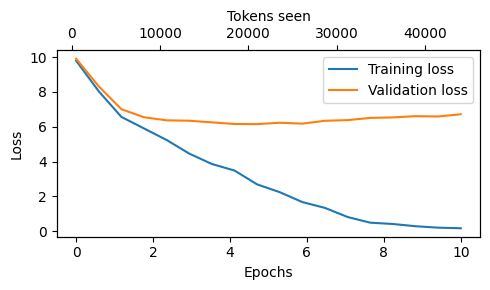

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3)) # returns a figure and a set of subplots
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True)) 

    ax2 = ax1.twiny() # create a second x axis with the same y axis
    ax2.plot(tokens_seen, train_losses, alpha=0) # An invisible plot, just for aligning the x-axis ticks
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()

epochs_seen = torch.linspace(0, num_epochs, len(train_losses)) # the elements in this need not be integers
plot_losses(epochs_seen, tokens_seen, train_losses, val_losses)

In [32]:
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
    model, 
    idx = text_to_token_ids("Every effort moves you", tokenizer) ,
    max_new_tokens=25, 
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you?"

"Yes--quite insensible to the irony. She wanted him vindicated--and by me!"




In [33]:
# Illustrating temperature scaling
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}
inv_vocab = {v:k for k, v in vocab.items()}

In [34]:
inv_vocab

{0: 'closer',
 1: 'every',
 2: 'effort',
 3: 'forward',
 4: 'inches',
 5: 'moves',
 6: 'pizza',
 7: 'toward',
 8: 'you'}

In [35]:
next_token_logits = torch.tensor([4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79])
# let's say that these are the predicted next token logits given the start context "Every effort moves you"

In [36]:
probs = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probs).item()
print(inv_vocab[next_token_id], probs)

forward tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040])


In [37]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probs, num_samples=1).item()
print(inv_vocab[next_token_id])

forward


In [38]:
torch.multinomial(torch.tensor([0.2, 0.3, 0.1, 0.1, 0.4]), num_samples=1)

tensor([0])

In [39]:
torch.multinomial(torch.tensor([2., 3., 1., 1., 4.]), num_samples=1)

tensor([0])

In [40]:
torch.manual_seed(123)
samples = [torch.multinomial(probs, num_samples=1).item() for _ in range(1000)]
sample_count = torch.bincount(torch.tensor(samples))
print(sample_count)

tensor([ 73,   0,   0, 582,   2,   0,   0, 343])


In [41]:
def print_sampled_tokens(probs): # we run the multinomial sampling a thousand times to see frequencies of the next token word
    torch.manual_seed(123)
    samples = [torch.multinomial(probs, num_samples=1).item() for _ in range(1000)]
    sample_count = torch.bincount(torch.tensor(samples)) # Count the frequency of each value in an array of
    # non-negative ints. Turns out the frequencies are sorted in the order of those integers

    for i, freq in enumerate(sample_count):
        print(f" {freq} X {inv_vocab[i]}")

print_sampled_tokens(probs)
    

 73 X closer
 0 X every
 0 X effort
 582 X forward
 2 X inches
 0 X moves
 0 X pizza
 343 X toward


In [42]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

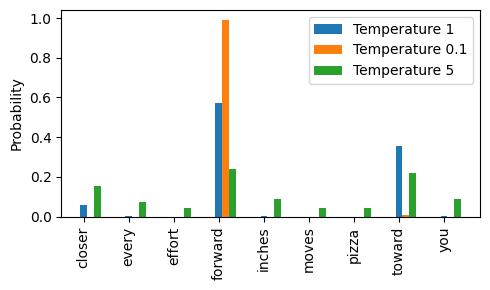

In [43]:
# we want to plot the probabilities of the words in the vocabulary for different temperatures
temperatures = [1, 0.1, 5]
scaled_probs = [softmax_with_temperature(next_token_logits, T) for T in temperatures]
x = torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5,3))
for i, T in enumerate(temperatures): # three bar plots in one plot corresponding to the three temperatures
    ax.bar(x + bar_width *i, scaled_probs[i], bar_width, label=f"Temperature {T}")

ax.set_ylabel("Probability")
ax.set_xticks(x) # set the x ticks at x axis locations corresponding to the vocab words (token IDs of those words)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


In [44]:
print("Temperature 1: ")
print_sampled_tokens(probs)
print("Probability of 'pizza' as the next token: ", probs[vocab["pizza"]].item())
print("Temperature 5: ")
temp_5_probs = softmax_with_temperature(next_token_logits, 5)
print_sampled_tokens(temp_5_probs)
print("Probability of 'pizza' as the next token: ", temp_5_probs[vocab["pizza"]].item())
print("Temperature 0.1: ")
temp_point_one_probs = softmax_with_temperature(next_token_logits, 0.1)
print_sampled_tokens(temp_point_one_probs)
print("Probability of 'pizza' as the next token: ", temp_point_one_probs[vocab["pizza"]].item())


Temperature 1: 
 73 X closer
 0 X every
 0 X effort
 582 X forward
 2 X inches
 0 X moves
 0 X pizza
 343 X toward
Probability of 'pizza' as the next token:  0.00010120050865225494
Temperature 5: 
 165 X closer
 75 X every
 42 X effort
 239 X forward
 71 X inches
 46 X moves
 32 X pizza
 227 X toward
 103 X you
Probability of 'pizza' as the next token:  0.04299796000123024
Temperature 0.1: 
 0 X closer
 0 X every
 0 X effort
 985 X forward
 0 X inches
 0 X moves
 0 X pizza
 15 X toward
Probability of 'pizza' as the next token:  2.971829782368292e-38


In [45]:
temp_5_probs

tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])

In [46]:
# top k sampling
top_k = 3
top_logits, top_positions = torch.topk(next_token_logits, top_k)
print("Top logits: ", top_logits) # in descending order
print("Top positons: ", top_positions)

Top logits:  tensor([6.7500, 6.2800, 4.5100])
Top positons:  tensor([3, 7, 0])


In [47]:
new_logits = torch.where(
    condition = next_token_logits < top_logits[-1],
    input= torch.tensor(-float('inf')), # what to do if the condition is true
    other= next_token_logits # what to do if the condition is false
)
new_logits 

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])

In [48]:
topk_probs = torch.softmax(new_logits, dim=0)
print(topk_probs)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


In [49]:
def generate(model, idx, max_new_tokens, context_size,
            temperature=0.0, top_k=None, eos_id=None): # refinement of the generate_text_simple function
    for _ in range(max_new_tokens):
        idx_context = idx[:, -context_size:] 
        with torch.no_grad():
            logits = model(idx_context) 
    
        logits = logits[:, -1, :] # the embedding vector corresponding to the last token id
        # for each input text in the batch; shape (batch_size, vocab_size)
        if top_k is not None:
            top_logits, top_positions = torch.topk(logits, top_k) # shape (batch_size, top_k)
            min_logits = top_logits[:, -1] # extract the min logit for each set of top_k logits in the batch
            logits = torch.where(
                condition= logits < min_logits,
                input= torch.tensor(-float("inf")).to(logits.device),
                other = logits  
            ) # the only reason we need the top logits is to get the min logits
            
        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1) # all the non top-k logits will have zero softmax output
            idx_next = torch.multinomial(probs, num_samples=1) # shape (batch_size, 1)
            
        else:
            idx_next = torch.argmax(probs, dim=-1, keepdim=True)

        if idx_next == eos_id:
            break
        idx = torch.cat((idx, idx_next), dim=1) 

    return idx

In [50]:
torch.manual_seed(123)
model.eval()
token_ids = generate(
    model = model, 
    idx = text_to_token_ids("Every effort moves you", tokenizer), 
    max_new_tokens=25, 
    context_size=GPT_CONFIG_124M["context_length"], 
    temperature=1.4,
    top_k=25,
)
print("Output: ", token_ids_to_text(token_ids, tokenizer))

Output:  Every effort moves you know," was one of a, as his glory, so inevitably the background of her own picture, he chucked painting because


In [51]:
# torch.save(model.state_dict(), "model.pth")

In [52]:
# model = GPTModel(GPT_CONFIG_124M)
# model.load_state_dict(torch.load("model.pth", map_location=device))
# model.eval()

In [53]:
# torch.save({
#     "model_state_dict": model.state_dict(),
#     "optimizer_state_dict": optimizer.state_dict(), 
#     },
#     "model_and_optimizer.pth"
# )

In [54]:
# checkpoint = torch.load("model_and_optimizer.pth", map_location=device)
# model = GPTModel(GPT_CONFIG_124M)
# model.load_state_dict(checkpoint["model_state_dict"])
# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
# optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
# model.train();

In [55]:
import urllib.request

url = (
    "https://raw.githubusercontent.com/rasbt/"
    "LLMs-from-scratch/main/ch05/"
    "01_main-chapter-code/gpt_download.py"
)
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, filename)

('gpt_download.py', <http.client.HTTPMessage at 0x13e9514f0>)

In [57]:
from gpt_download import download_and_load_gpt2
settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [58]:
print("Settings: ", settings)
print("Parameter dictionary keys: ", params.keys())

Settings:  {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys:  dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [59]:
print(params["wte"])
print("Token embedding weight tensor dimensions: ", params["wte"].shape)
# one 768 dimensional embedding vector for each token in the vocabulary

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions:  (50257, 768)


In [60]:
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

In [61]:
# now we need to create a new model and load the pretrained weights into the model
model_name = "gpt2-small (124M)"
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])# update these particular parameters

In [62]:
NEW_CONFIG.update({"context_length": 1024}) # changing from 256 to 1024

In [63]:
NEW_CONFIG.update({"qkv_bias": True})

In [64]:
gpt = GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [65]:
def assign(left, right): # returns right only if the shapes of left and right match
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    else:
        return torch.nn.Parameter(torch.tensor(right))

In [66]:
import numpy as np
def load_weights_into_gpt(gpt, params):
    # loading the token and positional embeddings
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params["wpe"])
    gpt.token_emb.weight = assign(gpt.token_emb.weight, params["wte"])

    for b in range(len(params["blocks"])): # for each of the 12 transformer blocks 
        # loading the query, key and value weight matrices
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T) # transposed, as stored in nn.Linear
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        # loading query, key and value bias vectors
        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        # loading the projection matrices at the very end, after getting the context vectors
        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])

        # loading the weights for the 3 layered FFNNs, layer[1] is just the GELU activations
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        # loading the layernorm scale and shift parameters for both instances, before attentino
        # and before FFNN
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])

    # loadinf final norm parameters and output head, which is the same as the token embedding
    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])


In [67]:
load_weights_into_gpt(gpt, params)
gpt.to(device)

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [68]:
torch.manual_seed(123)
token_ids = generate(
    model = gpt, 
    idx = text_to_token_ids("Every effort moves you", tokenizer).to(device), 
    max_new_tokens=25, 
    context_size=NEW_CONFIG["context_length"], 
    temperature=1.4,
    top_k=50,
)
print("Output text: ", token_ids_to_text(token_ids, tokenizer))

Output text:  Every effort moves you toward finding an ideal new way to practice something!

What makes us want to be on this side of the river?
